In [116]:
import cv2
import numpy as np 
import torch
import pandas as pd

In [5]:
df = pd.read_csv('/home/dangnh36/datasets/.comp/byu/processed/gt.csv')
df

,tomo_id,Z,Y,X,voxel_spacing,ori_num_motors,num_motors,ZA,YA,XA,V,VA,motor_z,motor_y,motor_x,motor_zA,motor_yA,motor_xA,motor_zyx,motor_zyxA
0,tomo_003acc,500,1912,1847,6.5,0,0,3250.0,12428.0,12005.5,1765732000,4.849142e+11,-1.0,-1.0,-1.0,-6.5,-6.5,-6.5,[],[]
1,tomo_00e047,300,959,928,15.6,1,1,4680.0,14960.4,14476.8,266985600,1.013588e+12,169.0,546.0,603.0,2636.4,8517.6,9406.8,"[[169.0, 546.0, 603.0]]","[[2636.4, 8517.6, 9406.8]]"
2,tomo_00e463,500,924,956,19.7,6,6,9850.0,18202.8,18833.2,441672000,3.376747e+12,235.0,403.0,137.0,4629.5,7939.1,2698.9,"[[235.0, 403.0, 137.0], [243.0, 363.0, 153.0],...","[[4629.5, 7939.099999999999, 2698.9], [4787.09..."
3,tomo_01a877,300,960,928,13.1,1,1,3930.0,12576.0,12156.8,267264000,6.008338e+11,147.0,638.0,286.0,1925.7,8357.8,3746.6,"[[147.0, 638.0, 286.0]]","[[1925.7, 8357.8, 3746.6]]"
4,tomo_02862f,300,959,928,15.6,1,1,4680.0,14960.4,14476.8,266985600,1.013588e+12,101.0,351.0,120.0,1575.6,5475.6,1872.0,"[[101.0, 351.0, 120.0]]","[[1575.6, 5475.599999999999, 1872.0]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,tomo_fe050c,300,959,928,15.6,1,1,4680.0,14960.4,14476.8,266985600,1.013588e+12,138.0,134.0,542.0,2152.8,2090.4,8455.2,"[[138.0, 134.0, 542.0]]","[[2152.7999999999997, 2090.4, 8455.199999999999]]"
644,tomo_fe85f6,800,928,960,13.1,0,0,10480.0,12156.8,12576.0,712704000,1.602223e+12,-1.0,-1.0,-1.0,-13.1,-13.1,-13.1,[],[]
645,tomo_fea6e8,300,960,928,16.8,0,0,5040.0,16128.0,15590.4,267264000,1.267268e+12,-1.0,-1.0,-1.0,-16.8,-16.8,-16.8,[],[]
646,tomo_ff505c,300,959,928,15.6,1,1,4680.0,14960.4,14476.8,266985600,1.013588e+12,111.0,816.0,678.0,1731.6,12729.6,10576.8,"[[111.0, 816.0, 678.0]]","[[1731.6, 12729.6, 10576.8]]"


In [35]:
df.query('tomo_id == "tomo_122c46"').iloc[0]

tomo_id               tomo_122c46
Z                             300
Y                             960
X                             928
voxel_spacing                16.8
ori_num_motors                  0
num_motors                      0
ZA                         5040.0
YA                        16128.0
XA                        15590.4
V                       267264000
VA                1267267534848.0
motor_z                      -1.0
motor_y                      -1.0
motor_x                      -1.0
motor_zA                    -16.8
motor_yA                    -16.8
motor_xA                    -16.8
motor_zyx                      []
motor_zyxA                     []
Name: 43, dtype: object

stride: [1.0273973 1.0265486 1.0265486]
R2: 64
R2: 64
display: (640, 640, 3) uint8


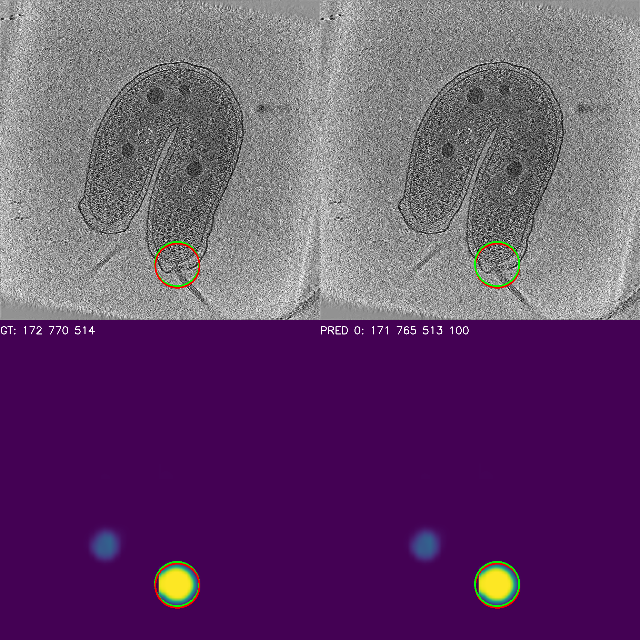

In [114]:
import PIL
from IPython.display import Image
from IPython.display import display as idisplay
import os
import matplotlib.pyplot as plt


DATA_DIR = '/home/dangnh36/datasets/.comp/byu/raw/train/'


def longest_resize(img, max_h = None, max_w = None, upscale = False, interpolation = cv2.INTER_LINEAR):
    if max_h is None and max_w is None:
        return img
    img_h, img_w = img.shape[:2]
    _ratios = []
    if max_h is not None:
        _ratios.append(max_h / img_h)
    if max_w is not None:
        _ratios.append(max_w / img_w)
    r = min(_ratios)
    if not upscale:
        r = min(1.0, r)
    if r == 1.0:
        return img
    new_h, new_w = int(r * img_h), int(r * img_w)
    img = cv2.resize(img, (new_w, new_h), interpolation)
    return img
    

def display_img(img, max_h = None, max_w = None):
    img = longest_resize(img, max_h, max_w)
    print('display:', img.shape, img.dtype)
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)
    idisplay(PIL.Image.fromarray(img))

    
def create_heatmap_image(data: np.ndarray) -> np.ndarray:
    """
    Converts a 2D NumPy array of floats in [0, 1] to a heatmap image (uint8 RGB).
    
    Args:
        data: 2D NumPy array with values in [0, 1].

    Returns:
        heatmap: 3D NumPy array of uint8 RGB values (H, W, 3).
    """
    assert data.min() >= 0 and data.max() <= 1, "Data must be in the range [0, 1]"

    # Get colormap (returns RGBA floats in [0, 1])
    colormap = plt.get_cmap('viridis')
    colored_data = colormap(data)  # shape: (H, W, 4)

    # Convert to uint8 RGB
    heatmap = (colored_data[:, :, :3] * 255).astype(np.uint8)
    return heatmap


def create_pair_viz(tomo_dir, ori_spacing, ori_shape, heatmap, ref_keypoint, sub_keypoints = None, tag = '', ref_color = (255, 0, 0), sub_color = (0, 255, 0), draw_title = False):
    Z, Y, X = ori_shape
    Z2, Y2, X2 = pred_heatmap.shape
    r = round(1000 / ori_spacing)
    z, y, x = [round(e) for e in ref_keypoint[:3]]
    if len(ref_keypoint) == 3:
        conf = None
    else:
        conf = round(ref_keypoint[3] * 100)
        
    if z == -1:
        has_kpt = False
        assert z == y == x == -1
        z = Z // 2
    else:
        has_kpt = True
    
    img_viz = cv2.imread(os.path.join(tomo_dir, f"slice_{z:04d}.jpg"), cv2.IMREAD_COLOR)
    Y, X = img_viz.shape[:2]    
    heatmap_viz = create_heatmap_image(heatmap[round(z * Z2 / Z)])
    heatmap_viz = cv2.resize(heatmap_viz, (X, Y))

    if draw_title:
        cv2.putText(heatmap_viz, f'ORI: {Z} {Y} {X}', (0, 120), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), thickness = 2)
        cv2.putText(heatmap_viz, f'SPA: {Z2} {Y2} {X2}', (0, 160), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), thickness = 2)
        cv2.putText(heatmap_viz, f'R:{r}', (0, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), thickness = 2)
        

    if sub_keypoints is not None:
        for sub_kpt in sub_keypoints:
            z2, y2, x2 = [round(e) for e in sub_kpt[:3]]
            r2 = round(max(0, (r ** 2 - (z2 - z) ** 2)) ** 0.5)
            print('R2:', r2)
            assert r2 >= 0
            if r2 > 0:
                cv2.circle(img_viz, (x2, y2), radius = r2, color = sub_color, thickness = 3)
                cv2.circle(heatmap_viz, (x2, y2), radius = r2, color = sub_color, thickness = 3)        

    if has_kpt:
        cv2.circle(img_viz, (x, y), radius = r, color = ref_color, thickness = 3)
        cv2.circle(heatmap_viz, (x, y), radius = r, color = ref_color, thickness = 3)
        cv2.putText(heatmap_viz, f'{tag}: {z} {y} {x} {conf if conf is not None else ""}', (0, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), thickness = 2)
            
    
    final_viz = np.concatenate([img_viz, heatmap_viz], axis = 0) # (2H, W, C)
    return final_viz


def create_viz(tomo_id, ori_spacing, ori_shape, gt_zyx, pred_heatmap, pred_keypoints):
    Z2, Y2, X2 = pred_heatmap.shape
    tomo_dir = os.path.join(DATA_DIR, tomo_id)
    Z, Y, X = ori_shape
    stride_Z, stride_Y, stride_X = Z / Z2, Y / Y2, X / X2
    stride_zyx = np.array([stride_Z, stride_Y, stride_X], dtype = np.float32)
    print('stride:', stride_zyx)
    pred_keypoints[:, :3] *= stride_zyx
    
    gt_viz = create_pair_viz(tomo_dir, ori_spacing, ori_shape, pred_heatmap, gt_zyx, pred_keypoints, tag = 'GT', ref_color = (255, 0, 0), sub_color = (0, 255, 0), draw_title = False)
    all_vizs = [gt_viz]
        
    for pred_idx, pred_kpt in enumerate(pred_keypoints):
        pred_viz = create_pair_viz(tomo_dir, voxel_spacing, ori_shape, pred_heatmap, pred_kpt, [gt_zyx], tag = f'PRED {pred_idx}', ref_color = (0, 255, 0), sub_color = (255, 0, 0))
        all_vizs.append(pred_viz)
    final_viz = np.concatenate(all_vizs, axis = 1)
    return final_viz

# TOMO_ID = 'tomo_003acc'
# TOMO_ID = 'tomo_2bb588'
TOMO_ID = 'tomo_256717'
row = df[df['tomo_id'] == TOMO_ID].iloc[0]
gt_zyx = (row['motor_z'], row['motor_y'], row['motor_x'])
voxel_spacing = row['voxel_spacing']
ori_shape = (row['Z'], row['Y'], row['X'])
pred = np.load(f'../preds/{TOMO_ID}.npy', allow_pickle=True).item()
# print(type(pred), pred)
pred_heatmap = pred['heatmap'][0]
pred_keypoints = pred['outputs']
viz_img = create_viz(TOMO_ID, voxel_spacing, ori_shape, gt_zyx, pred_heatmap, pred_keypoints)
display_img(viz_img, max_h = None, max_w = 640)